In [61]:
from flasher_lib import *
import matplotlib.pyplot as plt


In [62]:
def encontrar_indice(modulos, distancia_k):
    suma_modulos = 0
    for idx, modulo in enumerate(modulos):
        suma_modulos += modulo
        if distancia_k < suma_modulos:
            return idx
    print("Verificar que el i solicitado caiga en los i totales, usando v4")
    return -1  

In [63]:
def angulo_dos_ptos(p1, p2):
    return np.arctan2(p2[1] - p1[1], p2[0] - p1[0])

In [64]:
def lista_modulos(j, indices_totales, m, delta, alpha, epsilon, distancia_entre_ptos, sf):
    modulos = []
    for i in range(indices_totales):
        p1 = p(i, j, m, delta, alpha, epsilon, sf)
        p2 = p(i + 1, j, m, delta, alpha, epsilon, sf)
        distancia = e_distance(p1, p2)
        modulos.append(distancia)
        total_modulos = sum(modulos)    
        puntos_totales=np.floor(total_modulos/distancia_entre_ptos)
    return modulos, puntos_totales, total_modulos

In [65]:
#definir variables
m=4
delta=np.pi/3.7
alpha=np.pi/2-np.pi/m
#epsilon=10*np.pi/250
epsilon=0.0872665
eta=(np.pi/m)-(epsilon/2)
#i=6
j=m+1

In [79]:
r_i_j_cache = {}

def r_i_j(params):
    params_tuple = tuple(params)
    
    if params_tuple in r_i_j_cache:
        return r_i_j_cache[params_tuple]

    i, j, m, i_final, delta, alpha, epsilon, altura, s_f = params  # Añadir s_f a los parámetros
    resultados = []
    distancia_k = dk(altura, epsilon, m)
    punto_inicial = p(0, j, m, delta, alpha, epsilon, s_f)  # Pasar s_f a p
    punto_actual = punto_inicial 

    modulos_totales = lista_modulos(j, i_final, m, delta, alpha, epsilon, distancia_k, s_f)[0]
    total_modulos = lista_modulos(j, i_final, m, delta, alpha, epsilon, distancia_k, s_f)[2]
    
    if total_modulos < distancia_k:
        punto_actual = punto_inicial
    else:
        indice = encontrar_indice(modulos_totales, distancia_k * i)
        if indice == -1:
             return None
        
        remanente = distancia_k * i - sum(modulos_totales[:indice])
        resultados.append([indice, remanente])

        for idx, remanente in resultados:
            if idx >= i:
                break
        p_start = p(idx, j, m, delta, alpha, epsilon, s_f)  # Pasar s_f a p
        p_next = p(idx + 1, j, m, delta, alpha, epsilon, s_f)  # Pasar s_f a p
        #print("p_next", f'{idx + 1} {j} {p_next}')
        direccion = (p_next - p_start) / e_distance(p_next, p_start)
        desplazamiento = direccion * remanente
        punto_actual = p_start + desplazamiento

    r_i_j_cache[params_tuple] = (punto_actual,p_next)
    return punto_actual, indice

#i, j, m, i_final, delta, alpha, epsilon, altura, s_f = params  # Añadir s_f a los parámetros
# punto1= r_i_j(((1,0, 4, 6, delta,alpha,epsilon,20,6)))
# print(punto1)

(array([ 6.03418555, 29.58725753]), 2)


In [67]:
prueba=p(4, 3, 4, delta, alpha, epsilon, 2)
print(prueba)

[23.34518805  0.25192346]


In [69]:
#i, j, m, i_final, delta, alpha, epsilon, altura = params
s_ijk_cache = {}
#print("s_ijk_cache", s_ijk_cache)

def s_ijk(i, j, k, m, i_final, delta, alpha, epsilon, altura, sf):
    #determinar si ya esta en la cache
    params = (i, j, k, m, i_final, delta, alpha, epsilon, altura, sf)
    params_tuple = tuple(params)
    if params_tuple in s_ijk_cache:
        return s_ijk_cache[params_tuple]

    if k==0:
        punto,_=r_i_j((i, j, m, i_final, delta, alpha, epsilon, altura, sf))
        return punto
        #return r_i_j((i, j, m, i_final, delta, alpha, epsilon, altura, sf))[0]
    else:
        sigma_k=sigma(i, j, k-1, delta, alpha, eta, epsilon, m)
        sigma_direc=u(sigma_k)
        #print("direccion rho", f'sigma_{i},{j},{k}', sigma_direc)
        #punto1a=r_i_j((i+k, j, m, i_final, delta, alpha, epsilon, altura, sf))[0]
        #punto2a=r_i_j((i+k+1, j-1, m, i_final, delta, alpha, epsilon, altura, sf))[0]
        #phi_k=angulo_dos_ptos(punto1a, punto2a)
        phi_k=phi(k+i+1, j, delta, epsilon, m)
        phi_direc=u(phi_k)
        #print("direccion phi",f'phi_{i},{j},{k}', phi_direc)
        punto1=s_ijk(i, j, k-1, m, i_final, delta, alpha, epsilon, altura, sf)
        punto2=p(k+i+1,j, m, delta, alpha, epsilon, sf)
        #punto2=r_i_j((k-1, j, m, i_final, delta, alpha, epsilon, altura, sf))[1]
        #    i, j, m, i_final, delta, alpha, epsilon, altura, s_f = params  # Añadir s_f a los parámetros

        # print("punto1 generador k", f'p1_{i},{j},{k}', punto1)
        # print("punto2 generador k", f'p2_{i},{j},{k}', punto2)
        punto_conk=lineint(punto1, sigma_direc, punto2,phi_direc)
        #print("puntos s",f'{i}{j}{k}', punto_conk)
    s_ijk_cache[params_tuple] = punto_conk
    return punto_conk


# punto1= s_ijk(2,0,1, 4, 6, delta,alpha,epsilon,20,6)
# print("punto1", punto1)

In [70]:
a1=np.array([0,0])
a2=np.array([1,1])

print(lineint(a1, u(0), a2, u(np.pi/2)))

[1. 0.]


In [71]:
r_ijk_cache = {}
def r_ijk(i, j, k, m, i_final, delta, alpha, epsilon, altura, sf):
    #determinar si ya esta en la cache
    params = (i, j, k, m, i_final, delta, alpha, epsilon, altura, sf)
    params_tuple = tuple(params)
    if params_tuple in r_ijk_cache:
        return r_ijk_cache[params_tuple]

    if k==0:
        #print("k=0 en fn generadora")    
        #print("k=0", r_i_j((i, j, m, i_final, delta, alpha, epsilon, altura, sf))[0])
        return r_i_j((i, j, m, i_final, delta, alpha, epsilon, altura, sf))[0]
        
    else:
        rho_k=rho(i, j, k-1, delta, alpha, eta, epsilon, m)
        #rho_k=sigma(i, j-1, k-2, delta, alpha, eta, epsilon, m)
        rho_direc=u(rho_k)
        #print("direccion rho", f'rho_{i},{j},{k}', rho_direc)  
        #CAMBIO AQUI
        #punto1a=r_i_j((i+k-1, j+1, m, i_final, delta, alpha, epsilon, altura, sf))[0]
        #punto2a=r_i_j((i+k, j, m, i_final, delta, alpha, epsilon, altura, sf))[0]
        #phi_k=angulo_dos_ptos(punto1a, punto2a)
        phi_k=phi(k+i, j+1, delta, epsilon, m)
        #print("subdindices i y k", i, k)
        phi_direc=u(phi_k)  
        #print("direccion phi",f'phi_{i},{j},{k}', phi_direc)
        #punto1=r_ijk(i, j, k-1, m, i_final, delta, alpha, epsilon, altura)
        punto1=r_ijk(i, j, k-1, m, i_final, delta, alpha, epsilon, altura, sf)
        #punto2=r_i_j((k, j+1, m, i_final, delta, alpha, epsilon, altura))
        punto2=p(k+i,j+1, m, delta, alpha, epsilon, sf)
        # print("punto1 generador k", f'p1_{i},{j},{k}', punto1)
        # print("punto2 generador k," f'p2_{i},{j},{k}', punto2)
        punto_conk=lineint(punto1, rho_direc, punto2,phi_direc)
        #print("puntos r_ijk", punto_conk)
    r_ijk_cache[params_tuple] = punto_conk
    return punto_conk 

# puntok= r_ijk(2,0,2, 4, 6, delta,alpha,epsilon,20,6)
#print(puntok)

In [72]:
phi_k=phi(3, 1, delta, epsilon, 4)
direcc_phi=u(phi_k) 
print(direcc_phi)

[0.55409847 0.83245113]


In [73]:
angulo=67.24092332115055
direccion_a=u(angulo)
print(direccion_a)

[-0.29868908 -0.95435048]


In [74]:
s_ijk_cache = {}        

i totales 3


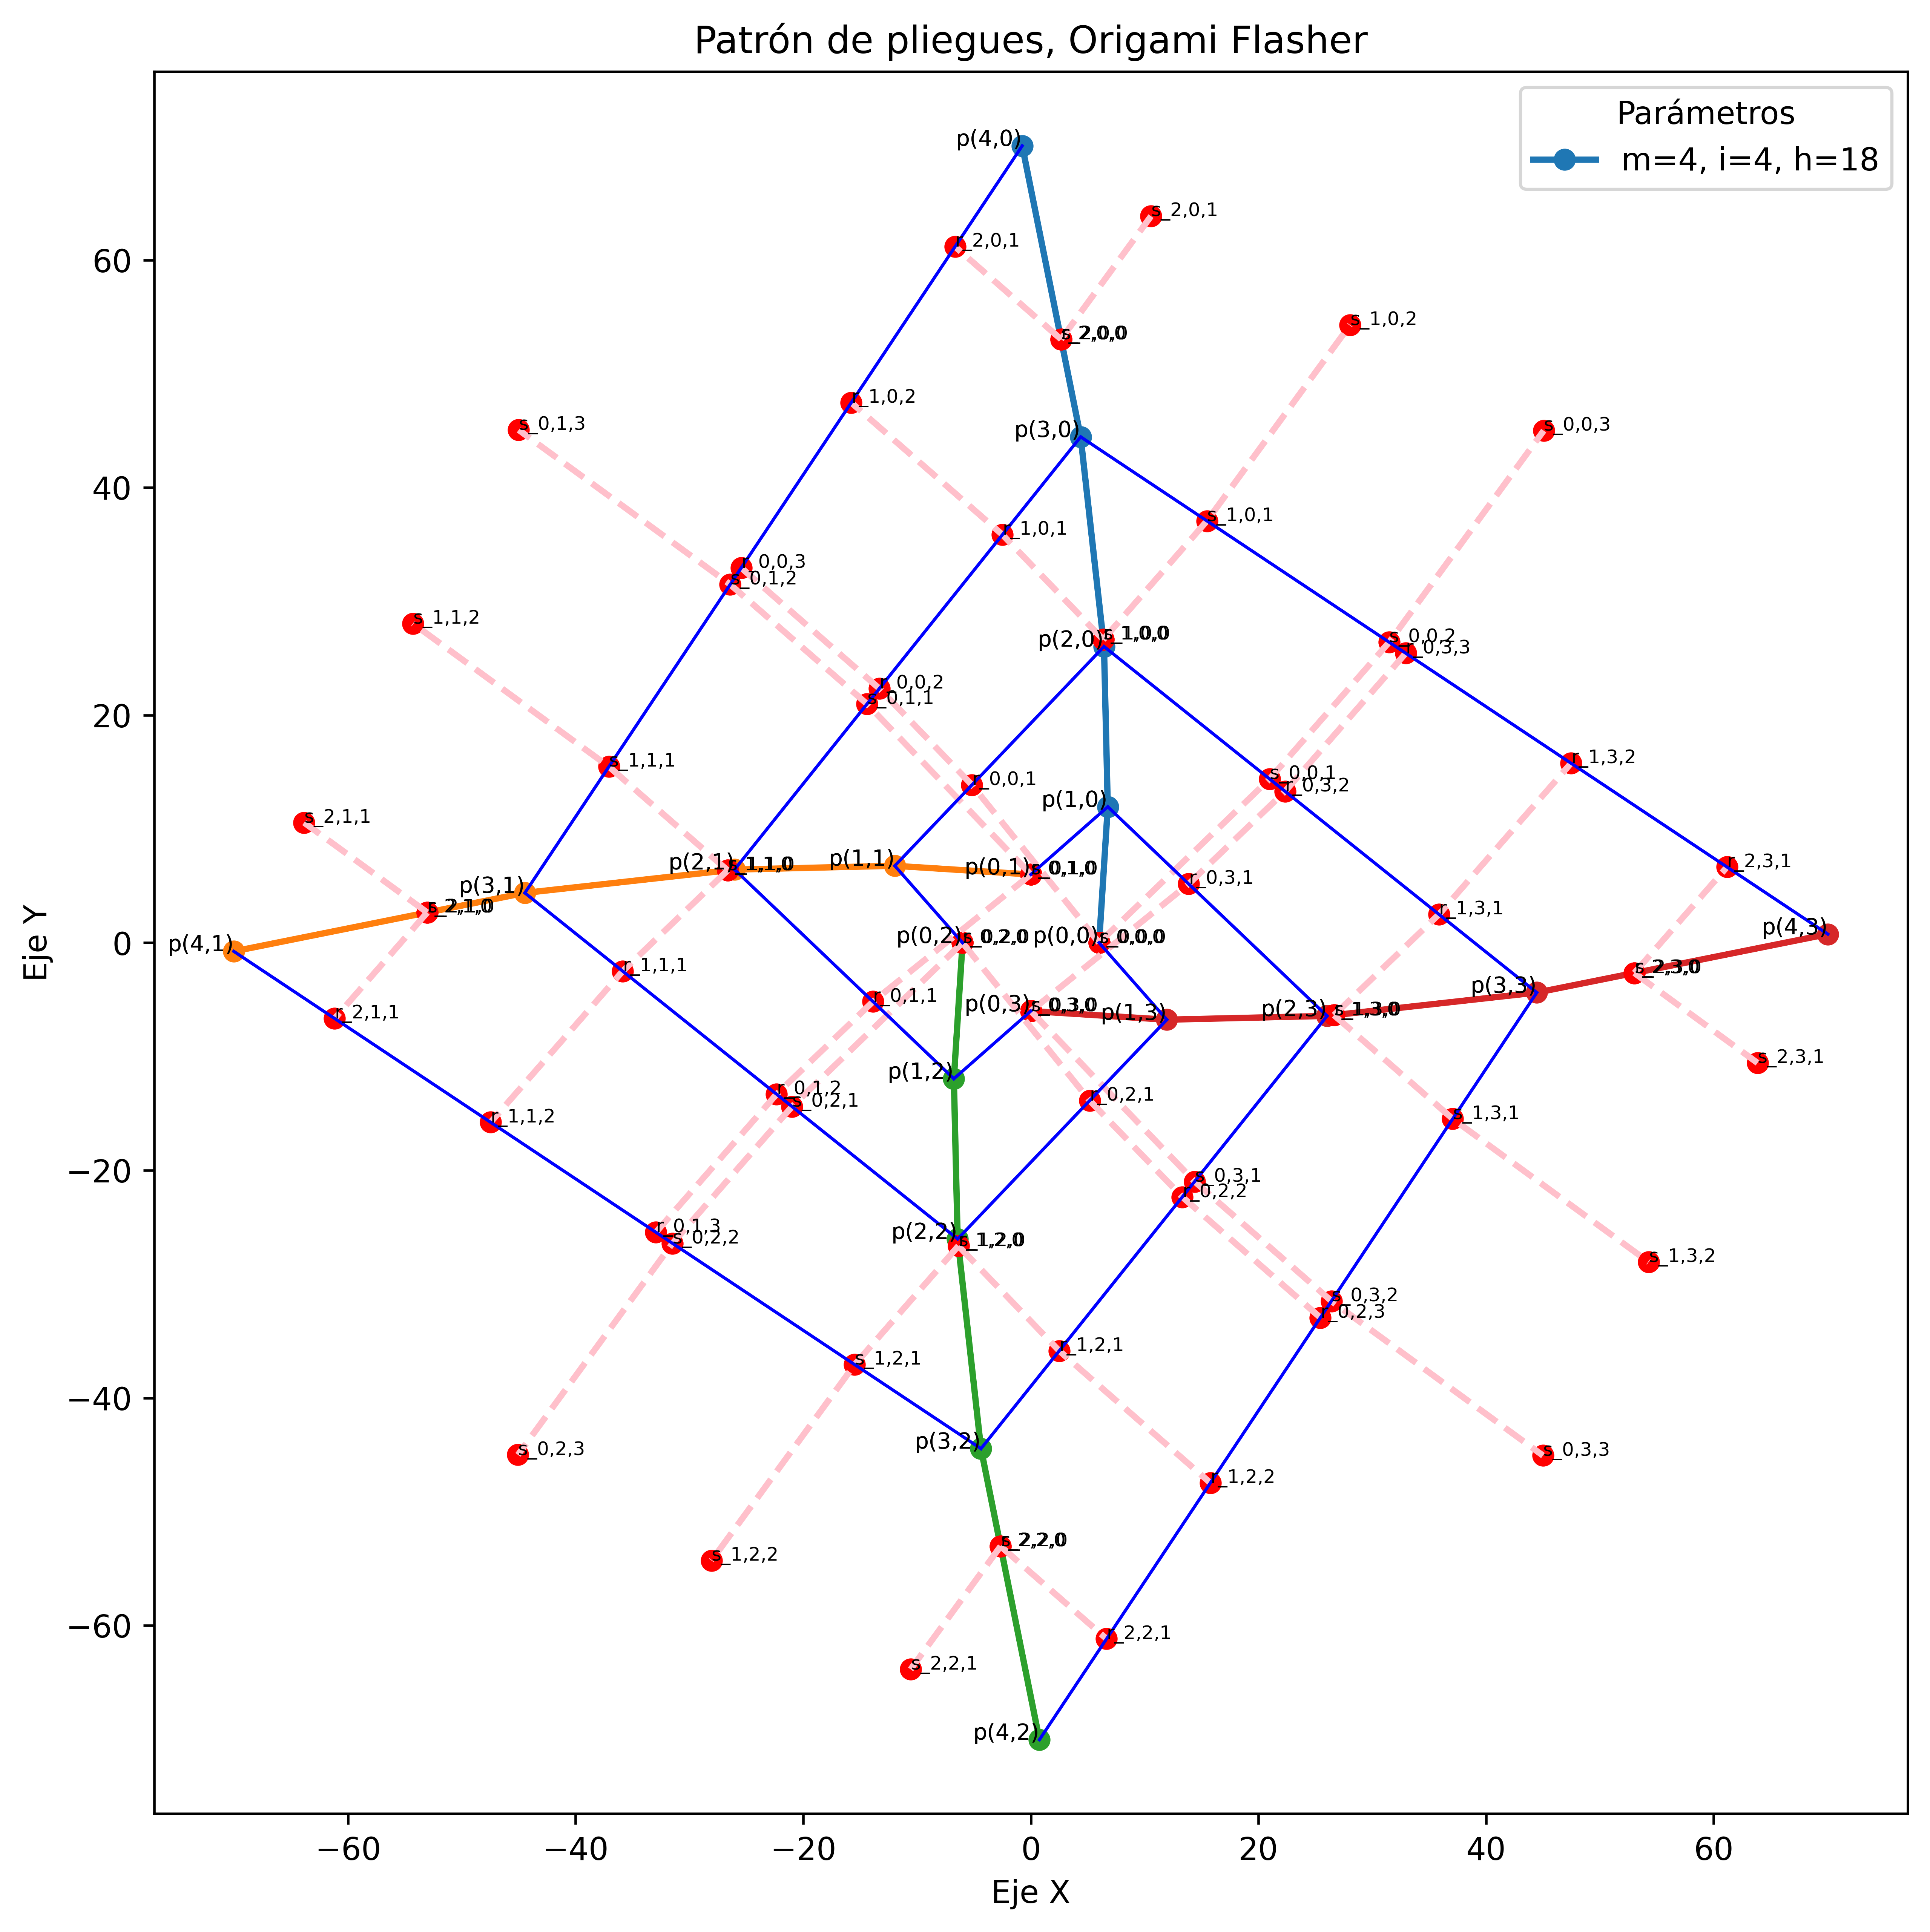

In [95]:
s_ijk_cache = {} 
# Parámetros
j_values = range(m)
i_final = 4
altura = 18
sf=6


# Asegúrate de tener bien definidas las funciones dk, lista_modulos, r_ijk y s_ijk
espacios = dk(altura, epsilon, m)
#print("espacios",espacios)
total_modulos = lista_modulos(j_values[0], i_final, m, delta, alpha, epsilon, espacios, sf)[2]
#print("total_modulos",total_modulos)
i_totales = int(np.ceil(total_modulos / espacios))  #la cantidad de r's que caben en una diagonal
print("i totales",i_totales)

# Inicializar diccionarios para almacenar los puntos de cada i, j para diferentes k
puntos_r = {(i, j): [] for i in range(i_totales) for j in j_values}
puntos_s = {(i, j): [] for i in range(i_totales) for j in j_values}

plt.figure(figsize=(10, 10), dpi=600)
# plt.xlim(-50, 50)
# plt.ylim(-50, 50)

x_values_p = np.zeros((i_final+1, m))
y_values_p = np.zeros((i_final+1, m))

for i in range(i_final+1):
    for j in range(len(j_values)):  # Asegúrate de que j_values tiene valores en un rango apropiado
        punto_p = p(i, j_values[j], m, delta, alpha, epsilon, sf)  # Generar punto p(i,j)
        x_values_p[i, j] = punto_p[0]
        y_values_p[i, j] = punto_p[1]
        plt.text(x_values_p[i, j], y_values_p[i, j], f'p({i},{j})', fontsize=7, ha='right')

for j in range(len(j_values)):
    plt.plot(x_values_p[:, j], y_values_p[:, j], linestyle='-', linewidth=2, marker='o', label=f'j={j_values[j]}')  # Unir puntos con el mismo j

for j in j_values:
    for i in range(i_final+1):
        punto_p= p(i, j, m, delta, alpha, epsilon, sf) 
        x_valor= punto_p[0]
        y_valor= punto_p[1]
        plt.plot(x_valor, y_valor, linestyle='-', linewidth=2)

# Iterar sobre los valores de i y j para calcular los puntos
for i in range(i_totales):
    for j in j_values:
        for k in range(i_final - i):
            # Obtener los puntos r_ijk y s_ijk
            punto_k = r_ijk(i, j, k, m, i_final, delta, alpha, epsilon, altura, sf)
            #print(f"punto_r({i}, {j}, {k}) = {punto_k}")
            punto_s = s_ijk(i, j, k, m, i_final, delta, alpha, epsilon, altura, sf)
            #print(f"punto_s({i}, {j}, {k}) = {punto_s}")
            # Guardar los puntos en las listas correspondientes a i y j
            puntos_r[(i, j)].append(punto_k)
            puntos_s[(i, j)].append(punto_s)
            # print("r", puntos_r)
            # print("s", puntos_s)
            
            # Graficar los puntos individuales con etiquetas
            plt.text(punto_k[0], punto_k[1], f'r_{i},{j},{k}', fontsize=6)
            plt.plot(punto_k[0], punto_k[1], 'ro')  # Puntos de r en rojo
            
            plt.text(punto_s[0], punto_s[1], f's_{i},{j},{k}', fontsize=6)
            plt.plot(punto_s[0], punto_s[1], 'ro')  # Puntos de s en azul

# Conectar los puntos para cada (i, j), variando k
for (i, j), puntos_r_ij in puntos_r.items():
    if len(puntos_r_ij) > 1:
        # Extraer las coordenadas para r
        x_values_r_ij = [punto[0] for punto in puntos_r_ij]
        y_values_r_ij = [punto[1] for punto in puntos_r_ij]
        # Graficar las líneas que conectan los puntos con el mismo i y j, pero diferentes k
        #plt.plot(x_values_r_ij, y_values_r_ij, linestyle='--', color='cyan', label=f'Linea r i={i}, j={j}')
        plt.plot(x_values_r_ij, y_values_r_ij, linestyle='--', color='pink', linewidth=2)
for (i, j), puntos_s_ij in puntos_s.items():
    if len(puntos_s_ij) > 1:
        # Extraer las coordenadas para s
        x_values_s_ij = [punto[0] for punto in puntos_s_ij]
        y_values_s_ij = [punto[1] for punto in puntos_s_ij]
        # Graficar las líneas que conectan los puntos con el mismo i y j, pero diferentes k
        #plt.plot(x_values_s_ij, y_values_s_ij, linestyle='--', color='pink', label=f'Linea s i={i}, j={j}')
        plt.plot(x_values_s_ij, y_values_s_ij, linestyle='--', color='pink', linewidth=2)

x_coords = np.zeros((i_final+1, len(j_values)))  # Matriz para valores de x
y_values_p = np.zeros((i_final+1, len(j_values)))  # Matriz para valores de y

# Sumar 1 a j_values
j_values = [j  for j in j_values]

# Llenar las matrices con los puntos p(i,j)
for i in range(i_final+1):
    for j in range(len(j_values)):
        punto_p = p(i, j_values[j], m, delta, alpha, epsilon, sf)  # Generar punto p(i,j) con j_values modificados
        x_coords[i, j] = punto_p[0]
        y_values_p[i, j] = punto_p[1]
        plt.text(x_coords[i, j], y_values_p[i, j], f'p({i},{j})', fontsize=7, ha='right')

# Conectar los puntos p(i,j) con p(i+1,j-1)
for i in range(i_final):  # Para evitar salir del rango en i+1
    for j in range(0, len(j_values)):  # Para evitar salir del rango en j-1
        plt.plot([x_coords[i, j], x_coords[i + 1, j - 1]],  # Línea entre p(i,j) y p(i+1,j-1)
                 [y_values_p[i, j], y_values_p[i + 1, j - 1]],
                 linestyle='-', linewidth=1, color='blue')

plt.title("Patrón de pliegues, Origami Flasher")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.axis('equal')
# plt.xlim(-100, 0)
# plt.ylim(0, 100)
plt.legend(title="Parámetros", labels=[f"m={m}, i={i_final}, h={altura}"])
plt.savefig("graficos_def1.pdf", dpi=600)  # Guardar como PNG con alto DPI
plt.show()


In [93]:
#esta funcion determina en qué nivel de dk está el punto p(i,j), útil para la funcion de diametro
def nivel_p(i, j, i_final, m, delta, alpha, epsilon, altura, sf):
    distancia_k = dk(altura, epsilon, m)    
    modulos, _, _ = lista_modulos(j, i_final, m, delta, alpha, epsilon, distancia_k, sf)
    suma_modulos = sum(modulos[:i])
    multiplo_dk = int(np.floor(suma_modulos / distancia_k))
    return multiplo_dk+1

#print(nivel_p(4, 0, 6, 4, delta, alpha, epsilon, 20, 6))

In [103]:
#entrega el diámetro plegado del flasher en mm
def diametro_plegado(i_final, j, m, delta, alpha, epsilon, altura, sf,grosor):
    acumulacion_grosores=[]
    for i in range(1, i_final + 1):
        nivel = nivel_p(i, j, i_final, m, delta, alpha, epsilon, altura, sf)
        grosor_de_ese_p = nivel * 2
        acumulacion_grosores.append(grosor_de_ese_p)
        diametro=((sum(acumulacion_grosores)-nivel_p(i_final, j, i_final, m, delta, alpha, epsilon, altura, sf))*grosor+sf/2)*2
        return diametro

#print(diametro_plegado(6, 0, 4, delta, alpha, epsilon, 20, 6,0.2))
    

4.4
